# Decision Tree

Submitted By: Anish Bhusal

Date of Submission: 3rd April,2020


Project-II

Fuse.AI Microdegree Program : ML 

Dataset: Sentiment Analysis(5 class)


**Contents**
1. Import Necessary Libraries and Dataset
2. Data Cleaning
3. Data Analysis and Visualization
4. Feature Extraction and Normalization
5. Grid Search
6. Model Evalutation

### 1 . Import Necessary Libraries and Dataset

Import Necessary Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import SMOTE

**Read Dataset**

Read train dataset and test dataset from two separate files.

In [16]:
train_df=pd.read_csv("../../data/Project-II/sentiment_5_class_train.csv")
train_df.head()

,Phrase,Sentiment
0,the prisoner,2
1,The sheer joy and pride they took in their wor...,3
2,has never made a more sheerly beautiful film t...,3
3,the story has the sizzle of old news that has ...,3
4,far superior,4


In [17]:
test_df=pd.read_csv("../../data/Project-II/sentiment_5_class_test.csv")
test_df.head()

,Phrase,Sentiment
0,"makes for a touching love story , mainly becau...",3
1,a truly magical movie,4
2,check,3
3,is a remarkably accessible and haunting film .,4
4,are too cute,3


### 2. Data Cleaning

In [18]:
#check if there are any NaN values
train_df.isna().sum()

Phrase       0
Sentiment    0
dtype: int64

In [19]:
test_df.isna().sum()

Phrase       0
Sentiment    0
dtype: int64

There are no NaN values. So we can proceed to next step.

**Remove unnecessary symbols from the Phrases**

In [37]:
import re
def clean_phrase(dataset):
    return re.sub("[^a-z\s']+"," ",dataset, flags=re.IGNORECASE)
train_df['Phrase']=train_df['Phrase'].apply(clean_phrase)
test_df['Phrase']=train_df['Phrase'].apply(clean_phrase)


### 3. Data Analysis and Visualization

In [38]:
print("Shape of training dataset: {} and test dataset: {}".format(train_df.shape,test_df.shape))

Shape of training dataset: (14711, 2) and test dataset: (3678, 2)


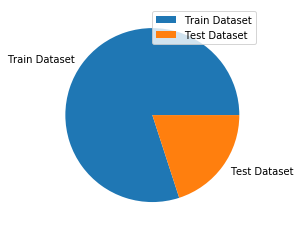

In [39]:
plt.pie(x=[len(train_df),len(test_df)],labels=["Train Dataset","Test Dataset"])
plt.legend()
plt.show()

Let's see which words are occuring the most in training set: 

In [40]:
import operator 
vocab=list()
#create a corpus of vocab
for i in train_df.Phrase.tolist():
    vocab.extend(i.lower().split(" "))

vocab_dict=dict(Counter(vocab))    

In [41]:
max(vocab_dict.items(), key = lambda k : k[1])

('', 18404)

'the' is max occuring word with frequency 5512

In [42]:
min(vocab_dict.items(), key = lambda k : k[1])

('leon', 1)

'single-handed' has occured only once

Now let's see how many labels are there each in training and test dataset

In [43]:
labels_count_train_df=Counter(train_df['Sentiment']) #Labels count in Training Dataset
labels_count_test_df=Counter(test_df["Sentiment"])

In [44]:
labels_count_train_df

Counter({2: 1876, 3: 7033, 4: 3649, 0: 988, 1: 1165})

In [45]:
labels_count_test_df

Counter({3: 1759, 4: 912, 2: 469, 0: 247, 1: 291})

Text(0, 0.5, 'Number of Phrases (Examples)')

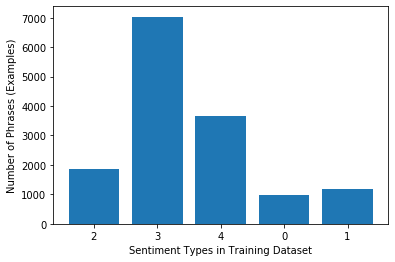

In [46]:
plt.bar(range(len(labels_count_train_df)),list(labels_count_train_df.values()),tick_label=list(labels_count_train_df.keys()))
plt.xlabel("Sentiment Types in Training Dataset")
plt.ylabel("Number of Phrases (Examples)")

Text(0, 0.5, 'Number of Phrases (Examples)')

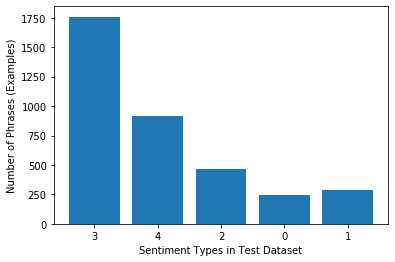

In [47]:
plt.bar(range(len(labels_count_test_df)),list(labels_count_test_df.values()),tick_label=list(labels_count_test_df.keys()))
plt.xlabel("Sentiment Types in Test Dataset")
plt.ylabel("Number of Phrases (Examples)")

From bar chart above for Training set, we can clearly see that dataset is imbalanced. The number of examples for "3" Sentiment Type is much higher than rest of the classes or labels. To make dataset balanced, let's use SMOTE method to upsample the dataset. Before that, we need to vectorize the dataset.

### 4. Feature Extraction and Normalization

Separate features and labels

In [48]:
X_train=train_df.Phrase.tolist()
y_train=train_df.Sentiment

X_test=test_df.Phrase.tolist()
y_test=test_df.Sentiment

In [49]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X_train)
X_train_v=vectorizer.transform(X_train)
X_test_v=vectorizer.transform(X_test)

Upsample our dataset now

In [50]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train_v,y_train)

In [51]:
Counter(y_train_smote)

Counter({2: 7033, 3: 7033, 4: 7033, 0: 7033, 1: 7033})

Our dataset is balanced now! 

The next step is to build model and grid search!

### 5. Model Building and Grid Search

Before starting to train our model, let's finalize some grid_params to pass to model for training

In [52]:
grid_params = {
    'max_depth': (3, 5, 7, 9, 11, 13),
    'min_samples_split': (2, 4, 6, 8, 10)
}

In [55]:
scorer=make_scorer(f1_score,average='macro')
clf=GridSearchCV(DecisionTreeClassifier(),grid_params,scoring=scorer)
clf.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': (3, 5, 7, 9, 11, 13),
               

In [56]:
print("The best score is: {} with params {}".format(clf.best_score_,clf.best_params_))

The best score is: 0.43178446466275683 with params {'max_depth': 13, 'min_samples_split': 2}


### 6. Model Evaluation

In [25]:
model=DecisionTreeClassifier(random_state=1,max_depth=13,min_samples_split=2)
model.fit(X_train_smote,y_train_smote)
y_pred=model.predict(X_test_v)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.21      0.25       247
           1       0.23      0.08      0.12       291
           2       0.21      0.81      0.34       469
           3       0.53      0.16      0.25      1759
           4       0.39      0.46      0.42       912

    accuracy                           0.32      3678
   macro avg       0.34      0.35      0.28      3678
weighted avg       0.42      0.32      0.29      3678



#### Save Model

In [26]:
import pickle
pickle.dump(model,open("dt_sentiment_analysis_saved_model","wb")) #save model 